# Lecture 9: Tensorflow 101


Tensorflow has become the world's most influential and important machine-learning library. As of December 2023, getting the GPU to work requires a little bit of extra work because of some open issues with the (plethora) of involved libraries:

[Github Issue Page](https://github.com/tensorflow/tensorflow/issues/62075)

Because we're dealing with a very large package with tons of dependencies, I recommend to create a new Anaconda environment for it. In Anaconda, environments are like collections of packages tailored for certain workloads. The default environment is called ``base`` and is automatically activated on startup. To create a new environment, open the Anaconda prompt and type 

```
conda create -n tf python=3.10
```

which creates a new environment called ``tf`` with a specific Python interpreter version. To activate it, type 

```
conda activate tf
```

while ``conda deactivate`` can be used to switch back to the base environment. A quick ``conda list`` reveals that ``tf`` only consists of a bare minimum of packages, so you need to install again whatever you need. First, make sure that ```pip``` is installed which will allow us to get ```Tensorflow``` from a different repository: 

```
conda install pip
```

Verify that the ```pip``` commands points to the local Python installation, not the system Python:

```
which pip
```

The output should be a folder inside your Anaconda installation, typically your home directory. Now you're ready to get Tensorflow and the necessary CUDA libraries:

```
pip install tensorflow[and-cuda]==2.14
```

Finish your setup by adding two more packages:

```pip install ipykernel matplotlib```

Once all packages are installed, we are ready to import Tensorflow into our notebook as well as the auxilary library ``keras``:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

2024-01-02 15:52:45.610052: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 15:52:45.610083: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 15:52:45.610097: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 15:52:45.614419: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Tensorflow comes with a broad collection of ready-to-use datasets that can be downloaded from the internet. One of these is the MNIST fashion dataset (see problem sheet 8):

In [2]:
fashionMnist = keras.datasets.fashion_mnist

(trainImages, trainLabels), (testImages, testLabels) = fashionMnist.load_data()

Please refer to the (excellent) Tensorflow online tutorial (upon which this introduction is based on) for an overview of all datasets available:

https://www.tensorflow.org/tutorials?hl=en

Typically, the datasets are provided as Numpy arrays. Let's have a look at the arrays that have been downloaded:

In [3]:
print(trainImages.shape, testImages.shape)

(60000, 28, 28) (10000, 28, 28)


So, we have a total of 60000 training images and 10000 test images that fall into one of ten categories of clothing:

Label | Description
--- | ---
0 | T-shirt/top
1 | Trouser
2 | Pullover
3 | Dress
4 | Coat
5 | Sandal
6 | Shirt
7 | Sneaker
8 | Bag
9 | Ankle boot

Let's build a sample of individual clothing item images - one for each kind - to get an idea of how these look like. For that, we will create a dictionary followed by a list of item descriptors which will serve as item keys. Within the loop, we go through the list of test data labels, get the associated descriptor and store it as variable ``item``. Then, we perform a check if this item is already part of the dictionary. If that's not the case, the image of the item is stored in the sample dictionary using the key ``item``.

In [4]:
sample = {}
descriptors = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]
nTrain = len(trainLabels)
nTest = len(testLabels)

for i in range(nTest):
    item = descriptors[ testLabels[i] ]
    if item not in sample:
        sample[item] = testImages[i,:,:]

It's subplot time again:

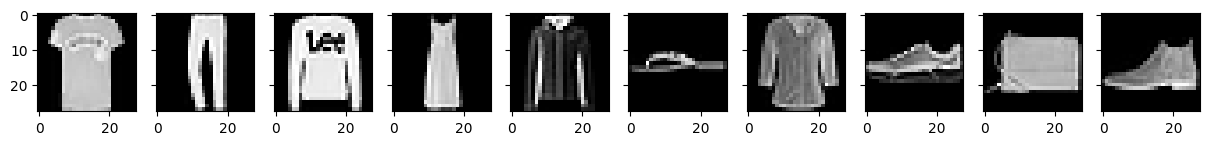

In [5]:
fig, frames = plt.subplots(1, 10, sharex=True, sharey=True, figsize=(15,10))

nPlots = len(descriptors)

for i in range(nPlots):
    item = descriptors[i]
    frames[i].imshow(sample[item], cmap='gray')

plt.show()

As final preprocessing step, we plot a distribution of all pixel values within the test image dataset to make sure we are dealing with normalized data:

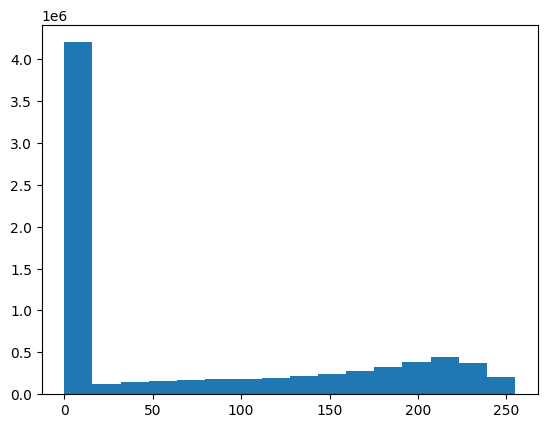

In [6]:
plt.hist(testImages.flatten(),16)
plt.show()

The data is already mostly zeros - which is nice - but we are not yet confined to the interval $[0,1]$. To achieve that, we need to divide all values by 255:

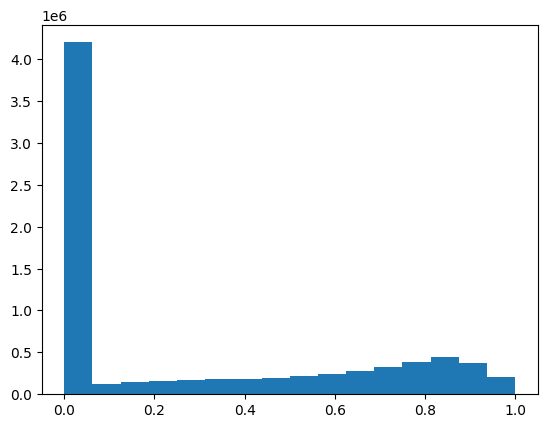

In [7]:
testImages = testImages/255
trainImages = trainImages/255

plt.hist(testImages.flatten(),16)
plt.show()

Time to build the network! In Tensorflow, the typical workflow looks like this:

- Prepare your data
- Set up the layers of your neural network, including activation functions
- Compile the model with a given numerical optimizer, loss function and optimization metric

Now that we already have the data prepared i.e. have it loaded into Numpy training and test arrays, we can stack up the layers of the model. The first layer of most typical networks is a flattening layer, just as in our custom neural network, to reduce the dimensionality of our data - mostly for numerical reasons.

Then, we add a ``Dense`` layer with 128 nodes which means that all nodes of the previous layer will be fully connected to 128 new nodes, defining the hidden layer. As an activation function, we use the rectified linear unit function which yields similar results as the sigmoid function but is computationally much less expensive. Finally, we add another dense layer with ten nodes and a softmax activation, representing the output layer.

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

2024-01-02 15:52:55.169283: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 15:52:55.173893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 15:52:55.174067: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Next, we need to compile the model. While several numerical optimization routines exist, the ``adam`` optimizer is a good general choice. It automatically adapts the learning rate so we don't need to specify it though there is a flag for that. ``sparse_categorical_crossentropy`` is the loss-function of choice whenever we want our network to determine to which category some input belongs. Finally, the optimization metric is set to accuracy, i.e. we want the optimizer to find the best-fit accuracy.

In [9]:
model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Before we train a model, it's always a good idea to print a model summary:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Apparently, we need to optimize more than 100,000 matrix weights using our test and training data which is carried out by calling the ``fit`` method and passing the training images and labels as arguments. In addition, we validate the model using our test dataset right during the training process and specify a total of 10 training epochs. Let's do this:

In [11]:
history = model.fit(trainImages, trainLabels, validation_data=(testImages, testLabels), epochs=10)

Epoch 1/10


2024-01-02 15:53:04.568493: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-02 15:53:04.657820: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa7da6ba800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-02 15:53:04.657844: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-01-02 15:53:04.663729: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-02 15:53:04.680587: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8900
2024-01-02 15:53:04.776842: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.5000 - accuracy: 0.8227 - val_loss: 0.4113 - val_accuracy: 0.8552
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - accuracy: 0.8657 - val_loss: 0.4047 - val_accuracy: 0.8560
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.8768 - val_loss: 0.4023 - val_accuracy: 0.8517
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8835 - val_loss: 0.3766 - val_accuracy: 0.8664
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8913 - val_loss: 0.3493 - val_accuracy: 0.8734
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.8953 - val_loss: 0.3388 - val_accuracy: 0.8797
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.8991 - val_loss: 0.3333 - val_accuracy: 0.8786
Epo

After 10 training epochs, we arrive at a test data accuracy of 91% and a validation data accuracy of 88%. Not too bad for such a simple model! A manual model evaluation can be triggered using the following code:

In [ ]:
testLoss, testAcc = model.evaluate(testImages, testLabels)

print('Network performance:', testAcc)

Using the ``predict`` method, we can automatically feed batches of data into the network and get the output it produces for every image:

313/313 [==============================] - 0s 588us/step
(10000, 10)
[8.5941156e-07 1.6712838e-11 1.2904549e-09 4.1747803e-12 2.1612065e-07
 4.1923905e-03 1.9561767e-08 2.3232403e-03 7.9087087e-08 9.9348313e-01]


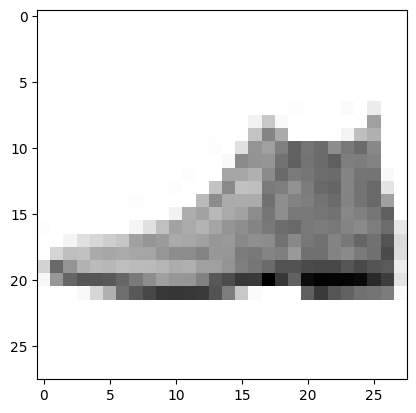

In [12]:
predictions = model.predict(testImages)
print(predictions.shape)

print(predictions[0,:])

plt.imshow(testImages[0], cmap='Greys')
plt.show()

Here, the network is almost 99% sure that test image 0 is an ankle boot. A handy tool to get a quick evaluation of the network performance is a confusion matrix which compares all predictions with all labels and not only tells us how many shirts have been correctly classified as shirts, but also how many shirts have been classified as boots or jackets:

In [13]:
predictedLabels = np.array( [np.argmax( vec ) for vec in predictions] )
res = tf.math.confusion_matrix(testLabels,predictedLabels)
print(res)

tf.Tensor(
[[818   1  14  20   5   1 131   0  10   0]
 [  3 974   0  15   3   0   3   0   2   0]
 [  9   2 783   9 103   0  90   0   4   0]
 [ 19  10  12 889  37   0  27   0   6   0]
 [  0   1  91  23 842   0  41   0   2   0]
 [  0   0   0   0   0 969   0  12   1  18]
 [ 98   3  74  28  86   0 697   0  14   0]
 [  0   0   0   0   0  30   0 927   1  42]
 [  3   0   3   4   4   2   4   2 978   0]
 [  0   0   0   0   0   6   1  19   0 974]], shape=(10, 10), dtype=int32)


According to the Tensorflow documentation, the matrix reads as follows:

*The matrix columns represent the prediction labels and the rows represent the real labels. The confusion matrix is always a 2-D array of shape [n, n], where n is the number of valid labels for a given classification task. Both prediction and labels must be 1-D arrays of the same shape in order for this function to work.*

What about individual images? Well, Tensorflow is optimized for batches of data, so we need to apply a little workaround to feed in single images:

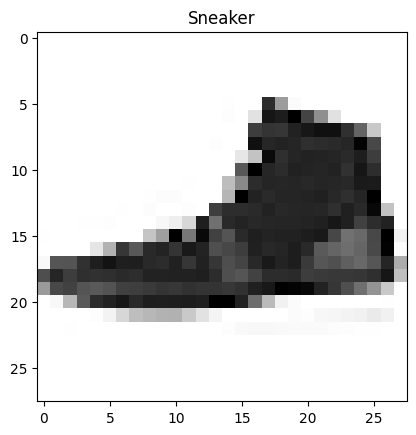

In [14]:
i = 43
img = testImages[i]

plt.title(descriptors[testLabels[i]])
plt.imshow(img, cmap='Greys')
plt.show()

What we need to do is to artificially expand the dimensionality of our 2D image to 3D, i.e. add a fake dimension. Then we can feed this expanded image into the network and see the output it produces:

In [15]:
imgExp = (np.expand_dims(img,0))
prediction = model.predict(imgExp)

print(prediction.shape)
print(prediction[0,:])
print("Maximum:", descriptors[np.argmax(prediction)])

1/1 [==============================] - 0s 21ms/step
(1, 10)
[1.5282543e-08 1.0764393e-11 3.1004171e-12 4.4274958e-14 9.7759308e-11
 1.8667616e-04 4.9272201e-11 7.2715867e-01 4.5904982e-09 2.7265459e-01]
Maximum: Sneaker


It's indeed a sneaker! 

Once we've trained our model - which can take hours, days or even weeks depending on the number of fit parameters, the complexity of the network and the size of the training dataset - it's advisable to store the model by calling the ``save`` method:

In [16]:
model.save('fashionNet.h5')

/home/nnds1b/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


A single line of code is sufficient to restore the model and reuse it in, e.g., a new notebook:

In [ ]:
newModel = keras.models.load_model('fashionNet.h5')

newModel.summary()

testLoss, testAcc = newModel.evaluate(testImages, testLabels)